머신러닝을 수행할 때 특성이 많으면 많을수록 정확도가 높아지나,  
데이터가 늘어날 수록 그 용량은 기하급수적으로 올라갈 수밖에 없다  
따라서 여러가지 특성 중에 큰 영향을 미치는 쪽으로 특성의 차원(개수)를 축소하여 사용한다고 한다.  

# 주 성분 분석

## PCA 클래스

In [13]:
# !wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

from sklearn.decomposition import PCA

# 100x100, 총 10000개의 데이터인데, 이것에서 50개의 특성만 뽑아냄
pca = PCA(n_components=50)
pca.fit(fruits_2d)

print(pca.components_.shape)

(50, 10000)


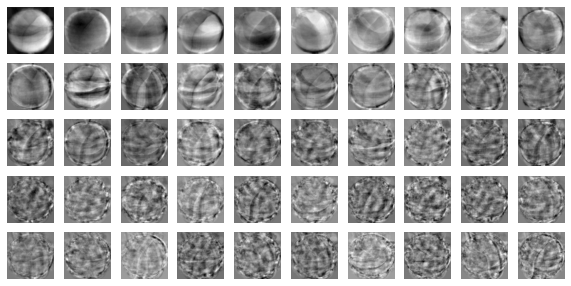

(300, 10000)
(300, 50)


In [14]:
import matplotlib.pyplot as plt

# 군집에서 사용했던 이미지 그리는 함수
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

draw_fruits(pca.components_.reshape(-1, 100, 100))

print(fruits_2d.shape)

fruits_pca = pca.transform(fruits_2d)

print(fruits_pca.shape)

## 원본 데이터 재구성


(300, 10000)


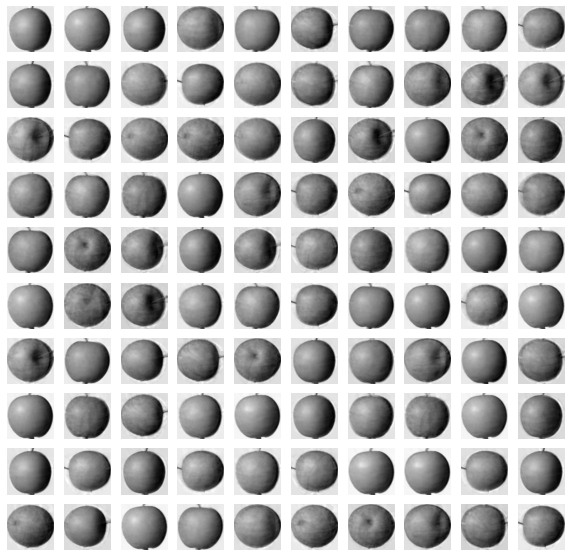

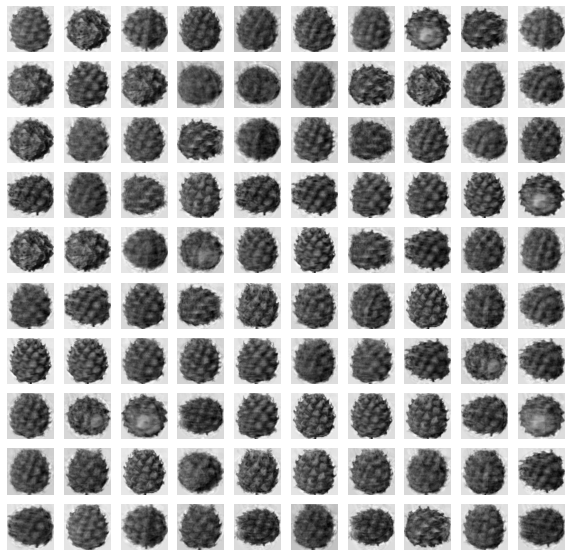

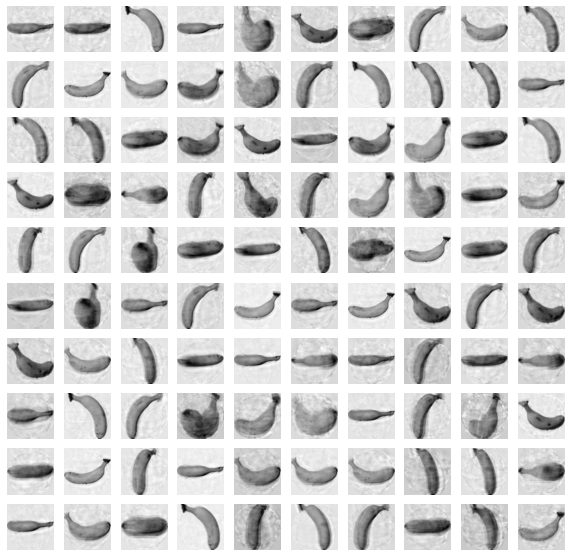

In [15]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")


## 설명된 분산


0.9215734389569166


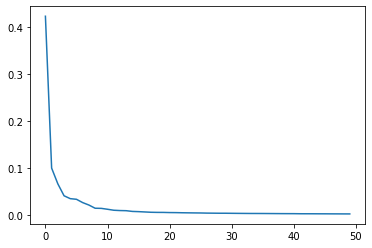

In [16]:
print(np.sum(pca.explained_variance_ratio_))

# 뒤로갈 수록 특성의 영향이 줄어든다.
plt.plot(pca.explained_variance_ratio_)

## 다른 알고리즘과 함께 사용하기


## 로지스틱과 함께

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

target = np.array([0] * 100 + [1] * 100 + [2] * 100)

from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 높은 점수를 내면서 시간은 더욱 줄었다.
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))


0.9966666666666667
0.40748963356018064
1.0
0.016618013381958008


In [18]:
# 실수를 넣  을 때는 설명된 분산의 비율
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

print(pca.n_components_)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

2
(300, 2)
0.9933333333333334
0.014688968658447266


/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

# k-means와 함께

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


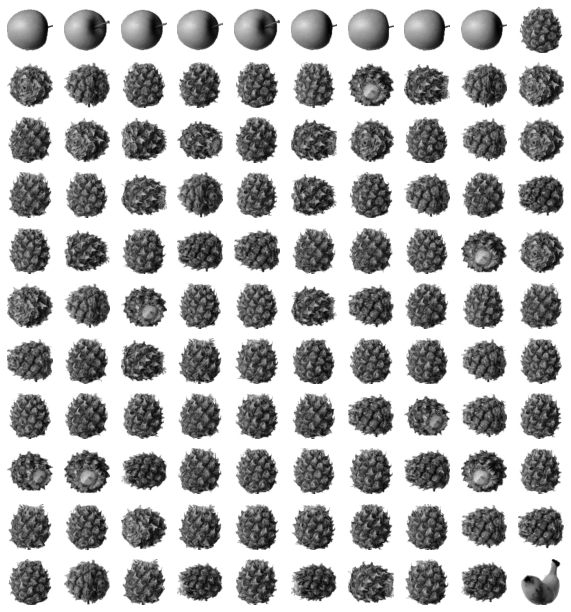

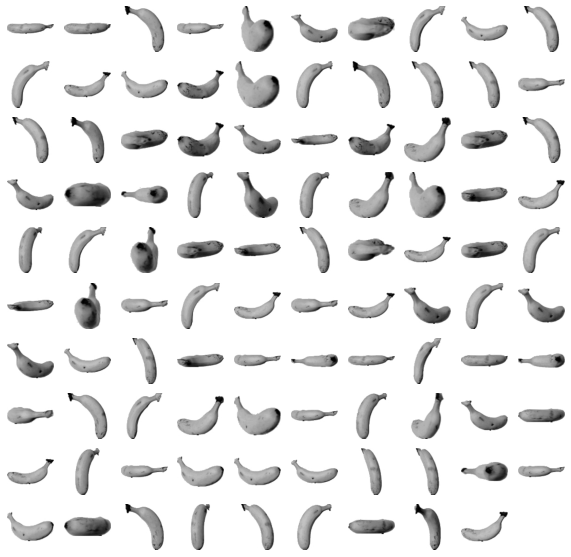

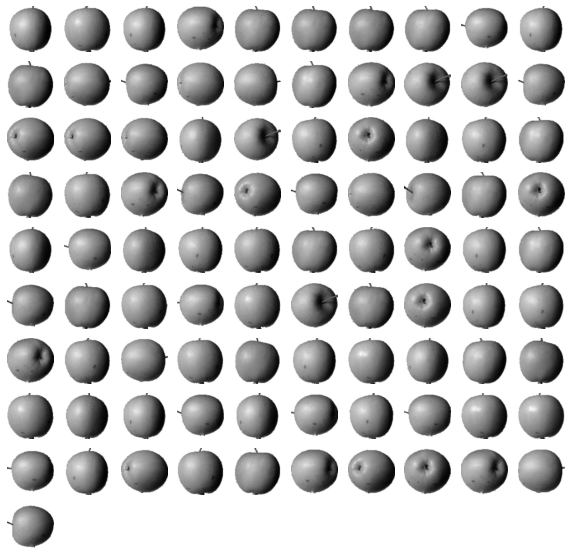

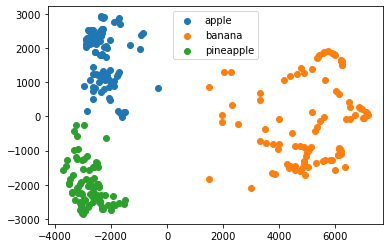

In [19]:

from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

print(np.unique(km.labels_, return_counts=True))

for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()